In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [4]:
def systemODE(h, t):
    # Fixed Species
    ADP = 0.2
    ATP = 1.0
    #Fruex = 5.0
    Glcex = 5.0
    Sucvac = 0
    UDP = 0.2
    glycolysis = 0
    phos = 5.1
    
    # Not Fixed Species
    Fru = h[0]
    Glc = h[1]
    HexP = h[2]
    Suc = h[3]
    Suc6P = h[4]
    
    # Parameters Keq, Ki, Km
    Keq6 = 10.0
    Keq8 = 5.0
    Ki1Fru = 0.5 # This K value was changed. 1.0 -> 0.5
    Ki2Glc = 1.0
    Ki3G6P = 0.1
    Ki4F6P = 10.0
    Ki5ADP = 2.0
    Ki5Fru = 12.0
    Ki6F6P = 0.4
    Ki6Pi = 3.0
    Ki6Suc6P = 0.07
    Ki6UDPGlc = 1.4
    Ki8Fru = 4.0
    Ki8Suc = 40.0
    Ki8UDP = 0.3
    Ki9Fru = 15.0
    Ki9Glc = 15.0
    Km10F6P = 0.2
    Km11Suc = 100.0
    #Km1Fruex = 0.1 # This K value was changed. 0.2 -> 0.1
    Km2Glcex = 0.2
    Km3ATP = 0.25
    Km3Glc = 0.07
    Km4ATP = 0.25
    Km4Fru = 10.0
    Km5ATP = 0.085
    Km5Fru = 0.1
    Km6F6P = 0.6
    Km6Suc6P = 0.1
    Km6UDP = 0.3
    Km6UDPGlc = 1.8
    Km7Suc6P = 0.1
    Km8Fru = 4.0
    Km8Suc = 50.0
    Km8UDP = 0.3
    Km8UDPGlc = 0.3
    Km9Suc = 10.0
    
    # Parameters Vmax
    Vmax1 = 0.286
    Vmax2 = 0.286
    Vmax3 = 0.197
    Vmax4 = 0.197
    Vmax5 = 0.164
    Vmax6f = 0.379
    Vmax6r = 0.2
    Vmax7 = 0.5
    Vmax8f = 0.677
    Vmax8r = 0.3
    Vmax9 = 0.372
    Vmax10 = 0.1
    Vmax11 = 1.0
    
    # Reactions
    v1 = Vmax1/(1 + Fru/Ki1Fru)  
    v2 = Vmax2*Glcex/(Km2Glcex*(1 + Glc/Ki2Glc) + Glcex)
    v3 = Vmax3 * Glc / Km3Glc * (ATP / Km3ATP) / ((1 + ATP / Km3ATP) * (1 + Glc / Km3Glc + Fru / Km4Fru + 0.113 * HexP / Ki3G6P + 0.0575 * HexP / Ki4F6P))
    v4 = Vmax4 * Fru / Km4Fru * (ATP / Km4ATP) / ((1 + ATP / Km4ATP) * (1 + Glc / Km3Glc + Fru / Km4Fru + 0.113 * HexP / Ki3G6P + 0.0575 * HexP / Ki4F6P))
    v5 = Vmax5/(1 + Fru/Ki5Fru)*(Fru/Km5Fru)*(ATP/Km5ATP)/(1 + Fru/Km5Fru + ATP/Km5ATP + Fru*ATP/(Km5Fru*Km5ATP) + ADP/Ki5ADP)
    v6 = Vmax6f * (0.0575 * HexP * 0.8231 * HexP - Suc6P * UDP / Keq6) / (0.0575 * HexP * 0.8231 * HexP * (1 + Suc6P / Ki6Suc6P) + Km6F6P * (1 + phos / Ki6Pi) * (0.8231 * HexP + Ki6UDPGlc) + Km6UDPGlc * 0.0575 * HexP + Vmax6f / (Vmax6r * Keq6) * (Km6UDP * Suc6P * (1 + 0.8231 * HexP / Ki6UDPGlc) + UDP * (Km6Suc6P * (1 + Km6UDPGlc * 0.0575 * HexP / (Ki6UDPGlc * Km6F6P * (1 + phos / Ki6Pi))) + Suc6P * (1 + 0.0575 * HexP / Ki6F6P))))
    v7 = Vmax7*Suc6P/(Km7Suc6P + Suc6P)
    v8 = -Vmax8f*(Suc*UDP - Fru*0.8231*HexP/Keq8)/(Suc*UDP*(1+Fru/Ki8Fru) + Km8Suc*(UDP+Ki8UDP) + Km8UDP*Suc + Vmax8f/(Vmax8r*Keq8)*(Km8UDPGlc*Fru*(1+UDP/Ki8UDP) + 0.8231*HexP*(Km8Fru*(1+Km8UDP*Suc/(Ki8UDP*Km8Suc)) + Fru*(1+Suc/Ki8Suc))))
    v9 = Vmax9/(1+Glc/Ki9Glc)*Suc/(Km9Suc*(1+Fru/Ki9Fru) + Suc)
    v10 = Vmax10*0.0575*HexP/(Km10F6P + 0.0575*HexP)
    v11 = Vmax11*Suc/(Km11Suc + Suc)
    
    # dx/dt
    dFrudt = v1 - v4 - v5 - v8 + v9
    dGlcdt = v2 + v9 - v3
    dHexPdt = v3 - v10 + v4 + v5 - 2*v6 - v8 
    dSucdt = v7 + v8 - v9 - v11
    dSuc6P = v6 - v7
    
    dhdt = [dFrudt, dGlcdt, dHexPdt, dSucdt, dSuc6P]
    return dhdt

In [5]:
t_array = np.linspace(0,10000,1001)
print(t_array)

[    0.    10.    20. ...  9980.  9990. 10000.]


In [6]:
h0 = [1.0,1.0,1.0,1.0,1.0]

In [7]:
output = scipy.integrate.odeint(systemODE, h0, t_array)
output

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.07849274e+00, 2.61844057e+00, 3.01539899e+00, 1.54269230e+00,
        4.75977801e-03],
       [1.01863246e+00, 4.00708378e+00, 4.49907442e+00, 1.40943424e+00,
        7.93145422e-03],
       ...,
       [1.00539350e+00, 3.78917183e+01, 1.30167948e+01, 6.83683921e+00,
        2.36981580e-02],
       [1.00539350e+00, 3.78917183e+01, 1.30167948e+01, 6.83683921e+00,
        2.36981580e-02],
       [1.00539350e+00, 3.78917183e+01, 1.30167948e+01, 6.83683921e+00,
        2.36981580e-02]])

Text(0.5, 1.0, 'Case 4:Simulation of dynamic system after deletion of one metabolite')

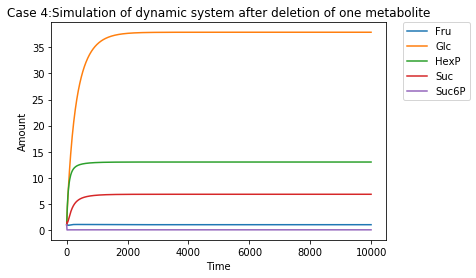

In [8]:
plt.plot(t_array,output[:,0],label='Fru')
plt.plot(t_array,output[:,1],label='Glc')
plt.plot(t_array,output[:,2],label='HexP')
plt.plot(t_array,output[:,3],label='Suc')
plt.plot(t_array,output[:,4],label='Suc6P')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title("Case 4:Simulation of dynamic system after deletion of one metabolite")